In [ ]:
import torch
import transformers
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, BertModel


In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased", output_attentions=True)

In [ ]:
text = "Patient reports persistent cough, high fever, and difficulty breathing for the past three days."
inputs = tokenizer(text, return_tensors="pt")

In [ ]:
outputs = model(**inputs)
attentions = outputs.attentions

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


In [ ]:
def plot_attention(attn, tokens):
    attn = attn.squeeze().mean(dim=0).detach().numpy()
    plt.figure(figsize=(10, 6))
    sns.heatmap(attn, xticklabels=tokens, yticklabels=tokens, cmap="coolwarm", annot=True)
    plt.title("Attention Heatmap")
    plt.show()

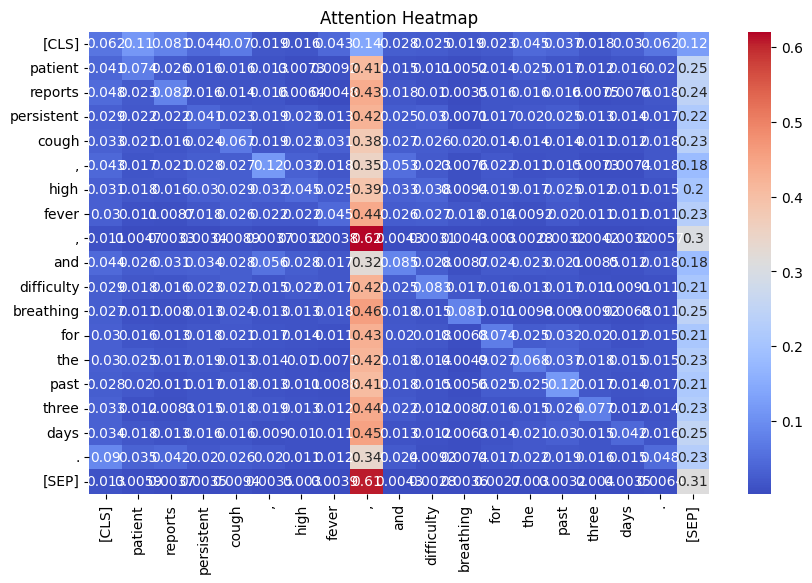

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
plot_attention(attentions[-1], tokens)